In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) + 1j *np.random.randn(n)*np.sqrt(dt)# 2d motion 
    for i in range(1,n-1):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i]
    Z = np.cumsum(V)* dt
    return(Z)

In [3]:
n=CVM(1000,1,1,0,0.1).real

In [7]:
# Simulate the velocity model multiple times
matrix_1 = np.zeros((10000,90))
#matrix_2 = np.zeros((1000,91)) # save including n[100]
for i in range(0,10000):
    n = CVM(1000,1,1,0,0.1).real
    matrix_1[i,:] = n[10:100] * n[10] 
   # matrix_2[i,:] = n[10:101]# get the 100th entry as well

In [8]:
print(matrix_1.mean(axis=0))

[0.19990859 0.22112089 0.24003262 0.25688036 0.27233365 0.28601883
 0.29833701 0.30940507 0.31932023 0.32825201 0.33619732 0.34327676
 0.34963474 0.35517808 0.36010599 0.36438904 0.36812505 0.37137702
 0.37424157 0.37691901 0.37927173 0.38122134 0.3830879  0.38459262
 0.38583492 0.38697513 0.38781266 0.38826351 0.38869647 0.38927802
 0.39000611 0.39064101 0.3910892  0.39164986 0.39231344 0.39291133
 0.3933982  0.39385209 0.39417175 0.39432391 0.39452349 0.39470653
 0.39524644 0.39580854 0.39644984 0.39678986 0.39704428 0.39729973
 0.39764334 0.39794949 0.39832404 0.39852423 0.39869453 0.3990016
 0.39925316 0.39940797 0.39950464 0.39954722 0.39966527 0.39964601
 0.399392   0.39933372 0.39941897 0.39949044 0.39956564 0.39990411
 0.40031218 0.40076336 0.40121849 0.40162624 0.40205552 0.40230295
 0.40245276 0.40276253 0.40311774 0.40370904 0.40429469 0.40490029
 0.40543575 0.40583893 0.40593973 0.40617011 0.40620434 0.40625907
 0.40632563 0.40640879 0.40634946 0.40626516 0.4061421  0.40593

In [6]:
E_XY = matrix_1.mean(axis=0)

In [40]:
# Calculate the theoretical covariance first approach
sigma = 1
a = 1 
s= 10
t = np.array(range(10,100))
theor_cov = np.zeros(len(t))
gamma= np.zeros(len(t))
for i in range(0,len(t)):
    gamma[i] = min(t[i],s) 

In [50]:
theor_cov = (sigma**2/(a**2))*(2*gamma - 2*(np.exp(-a*(t-gamma)) + np.exp(-a*(s-gamma)) - np.exp(-a*t) - np.exp(-a*s)) -np.exp(-a*(s+t-2*gamma)) + np.exp(-a*(s+t)))/(2*a)


In [51]:
theor_cov

array([7.5000908 , 8.44824294, 8.79704862, 8.92536706, 8.97257277,
       8.98993879, 8.99632738, 8.99867762, 8.99954222, 8.99986029,
       8.9999773 , 9.00002035, 9.00003618, 9.00004201, 9.00004415,
       9.00004494, 9.00004523, 9.00004534, 9.00004538, 9.00004539,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 ,
       9.0000454 , 9.0000454 , 9.0000454 , 9.0000454 , 9.00004

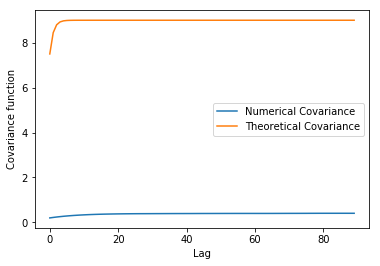

In [52]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov,label='Theoretical Covariance')
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()

In [32]:
# Calculate the theoretical covariance second approach
sigma = 1
a = 1 
s= 10
t = np.array(range(10,100))
theor_cov_diff_approach = np.zeros(len(t))
gamma= np.zeros(len(t))
for i in range(0,len(t)):
    gamma[i] = min(t[i],s) 

In [37]:
theor_cov_diff_approach = (0.5*sigma**2/a**3)*(2*np.exp(-a*gamma) -2 - np.exp(-a*(t+s)) + np.exp(-a*np.abs(t-s)) +2*a*gamma)

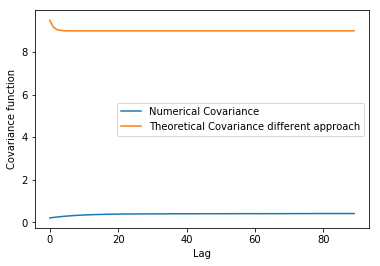

In [38]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov_diff_approach ,label='Theoretical Covariance different approach')
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()

In [ ]:
#print(matrix_2.mean(axis=0))# the second matrix, get the right bits from it to get E(X) and E(Y)

In [ ]:
# put everything together: Cov(X,Y)= E(XY) - E(X)E(Y) 
###E_X = matrix_2.mean(axis=0)[:-1] 
#E_Y=matrix_2.mean(axis=0)[-1]
#E_X_Y = E_X * E_Y

In [ ]:
#E_X_Y, the values are close to 0, as expected

In [ ]:
#Cov_X_Y = E_XY - E_X_Y

In [ ]:
#Cov_X_Y

In [ ]:
(-2-np.exp(-1))/2

In [ ]:
10-1.18

In [47]:
8.82/2

4.41